# Neural Network Classifier - QNN -Estimator - DGA Botnet detection

Madjid Tehrani
Cybersec-DMS (DMS GmbH)
#https://www.cybersec-dms.com/
Copyright © 2023, DMS GmbH. All rights reserved. Permission is hereby granted, free of charge, to any person obtaining a copy of this
software and associated documentation files (the "Software"), for academic research purposes, subject to the following conditions:
the above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.   


In [ ]:
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install -U qiskit_machine_learning
!pip install pylatexenc
!pip install qiskit --upgrade;
!pip install qiskit-aer;
!pip install qiskit-terra;
!pip install qiskit-machine-learning;

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit import QuantumCircuit, execute, Aer
from qiskit import *
from qiskit.utils import QuantumInstance
from azure.quantum import Workspace

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/yourID/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/yourWorkspace",
    location = "eastus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

workspace = Workspace (
    subscription_id = "yourID",
    resource_group = "AzureQuantum",
    name = "yourWorkspace",
    location = "eastus"

)

This workspace's targets:


Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot this issue.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code A6Z4FPE39 to authenticate.
- ionq.simulator
- ionq.simulator
- ionq.simulator
- ionq.qpu
- ionq.qpu
- ionq.qpu
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- ionq.qpu.aria-1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s1-apival
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-1sc
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s2-apival
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-2sc
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s1-sim
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-1e
- quantinuum.hqs-lt-s2-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.sim.h1-2e
- quantinuum.sim.h1-2e
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1
- quantinuum.qpu.h1-1
- quantinuum.qpu.h1-1
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2
- quantinuum.qpu.h1-2
- quantinuum.qpu.h1-2
- rigetti.sim.qvm
- rigetti.qpu.aspen-m-3
- microsoft.estimator


In [ ]:
# Create IonQ simulator and QPU backends
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")

# Create Rigetti simulator and QPU backends
rigetti_simulator_backend = provider.get_backend("rigetti.sim.qvm")
rigetti_qpu_backend = provider.get_backend("rigetti.qpu.aspen-m-3")

# Create Quantinuum simulator and QPU backends
Quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-2sc")
Quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-2")

# Create QASM simulator
AER_backend = Aer.get_backend('qasm_simulator')

In [ ]:
!wget https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv

--2023-08-16 15:35:52--  https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv
Resolving aq5efd7d2644dd406cb3ec2d.blob.core.windows.net (aq5efd7d2644dd406cb3ec2d.blob.core.windows.net)... 52.239.169.4
Connecting to aq5efd7d2644dd406cb3ec2d.blob.core.windows.net (aq5efd7d2644dd406cb3ec2d.blob.core.windows.net)|52.239.169.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75901 (74K) [text/csv]
Saving to: ‘BotnetDgaDataset_1000.csv’

BotnetDgaDataset_10 100%[===================>]  74.12K  --.-KB/s    in 0.04s   

2023-08-16 15:35:52 (1.97 MB/s) - ‘BotnetDgaDataset_1000.csv’ saved [75901/75901]



In [ ]:
import csv
import os
import numpy as np
from sklearn.datasets import make_blobs
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_QNNEstimator_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename
print(mycsv)
def load_data(filepath):
    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000
        n_features = 7
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

    return data, target
X, y = load_data(mycsv)
y01=y

/content/BotnetDgaDataset_1000.csv


In [ ]:
num_inputs = 7
num_samples = 50
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.algorithms.optimizers import SLSQP, SPSA

from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
!pip install pylatexenc

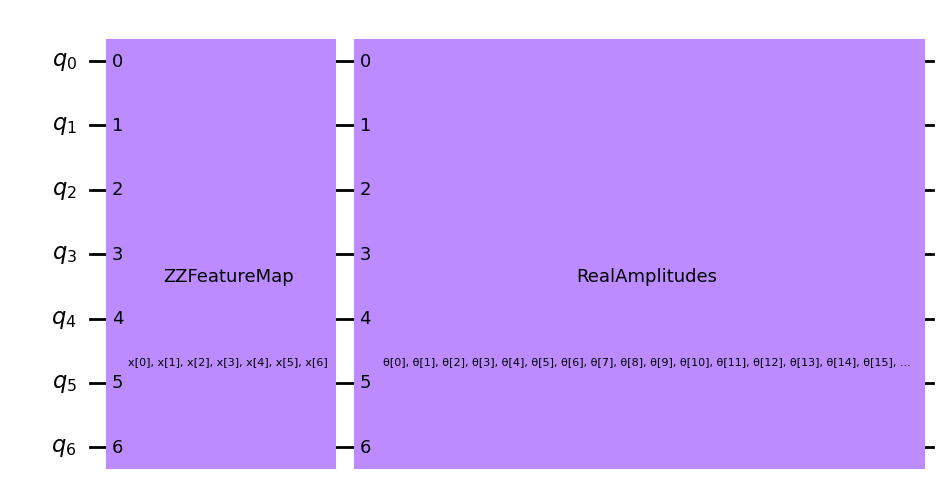

In [ ]:
# construct QNN
qc = QuantumCircuit(7)
feature_map = ZZFeatureMap(7)
ansatz = RealAmplitudes(7)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

Create a quantum neural network

In [ ]:
#Select your prefered backend
#backend = ionq_simulator_backend
#backend = ionq_qpu_backend
#backend = rigetti_simulator_backend
#backend = rigetti_qpu_backend
#backend = Quantinuum_simulator_backend
#backend = Quantinuum_qpu_backend
backend = AER_backend
transpiled = transpile(qc, backend)
transpiled.name="QNN-Estimator"
transpiled.measure_all()

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
# QNN maps inputs to [-1, +1]
estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))
print (algorithm_globals.random.random(estimator_qnn.num_weights))

[0.38331982 0.72968571 0.55299307 0.93613999 0.78030149 0.47936956
 0.37635947 0.98663154 0.71776024 0.95119466 0.11847858 0.85053368
 0.63707388 0.12192168 0.588258   0.68609637 0.01230269 0.45431796
 0.82539951 0.29535903 0.45854808 0.44231413 0.30192739 0.9184419
 0.78129404 0.11058841 0.99703466 0.87920002]


We will add a callback function called `callback_graph`. This will be called for each iteration of the optimizer and will be passed two parameters: the current weights and the value of the objective function at those weights. For our function, we append the value of the objective function to an array so we can plot iteration versus objective function value and update the graph with each iteration. However, you can do whatever you want with a callback function as long as it gets the two parameters mentioned passed.

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=SPSA(), callback=callback_graph
)

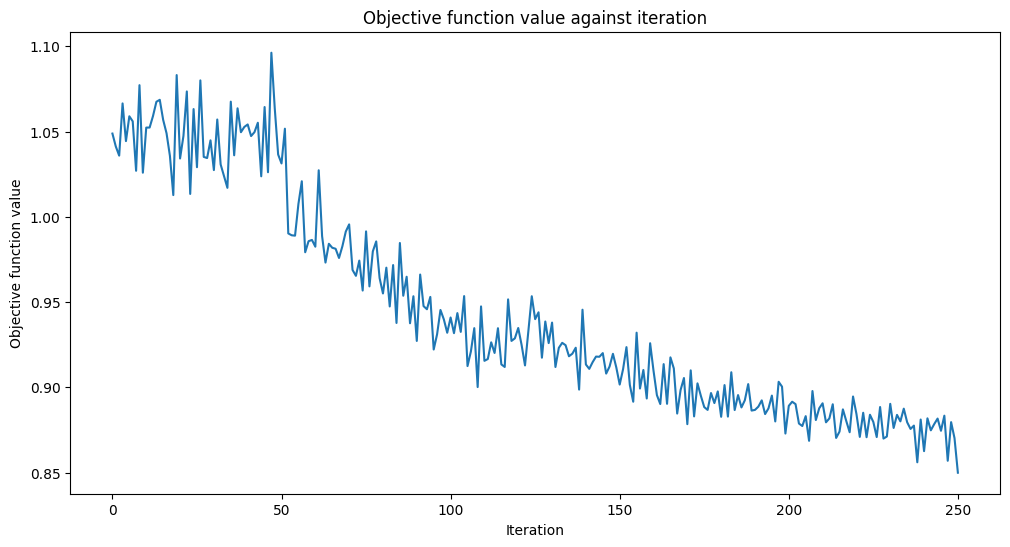

304.489090646


In [ ]:
# create empty array for callback to store evaluations of the objective function
import time
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
start_estimator = time.perf_counter()
# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)
finish_estimator = time.perf_counter()

Now, when the model is trained, we can explore the weights of the neural network. Please note, the number of weights is defined by ansatz.

In [ ]:
estimator_classifier.weights

array([ 1.36354785e+00,  9.84131441e-01,  6.57746107e-01,  1.32604081e+00,
        3.16866254e-01,  5.45285113e-01,  1.44180411e+00,  9.17668709e-01,
       -1.14035462e+00, -1.53082983e+00,  5.79662357e-01, -8.41646856e-01,
       -1.12239079e+00,  1.67437661e+00,  1.53054681e+00, -4.77705569e-01,
        1.53185777e-01,  1.16548634e+00, -3.08357079e-01,  1.85514046e+00,
       -1.72042042e-03,  2.49285686e-01,  6.11764544e-01,  9.73122010e-01,
       -1.64223193e-01, -1.75928285e-01,  1.10579537e+00, -1.49101178e+00])

In [ ]:
#AER
print("accuracy of QNN-Estimator=", estimator_classifier.score(X, y))
print("tims(s) of QNN-Sampler=",finish_estimator-start_estimator)

accuracy of QNN-Estimator= 0.8
tims(s) of QNN-Sampler= 304.489090646
